In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


Columns in the DataFrame: Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Sex', 'Age', 'Fare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2',
       'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3'],
      dtype='object')
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   PassengerId  100 non-null    int64  
 2   Survived     100 non-null    int64  
 3   Sex          100 non-null    int64  
 4   Age          100 non-null    float64
 5   Fare         100 non-null    float64
 6   Pclass_1     100 non-null    int64  
 7   Pclass_2     100 non-null    int64  
 8   Pclass_3     100 non-null    int64  
 9   Family_size  100 non-null    float64
 10  Title_1      100 non-null    int64  
 11  Title_2      100 non-null    int64  
 12  Title_3      100 non-null    int64

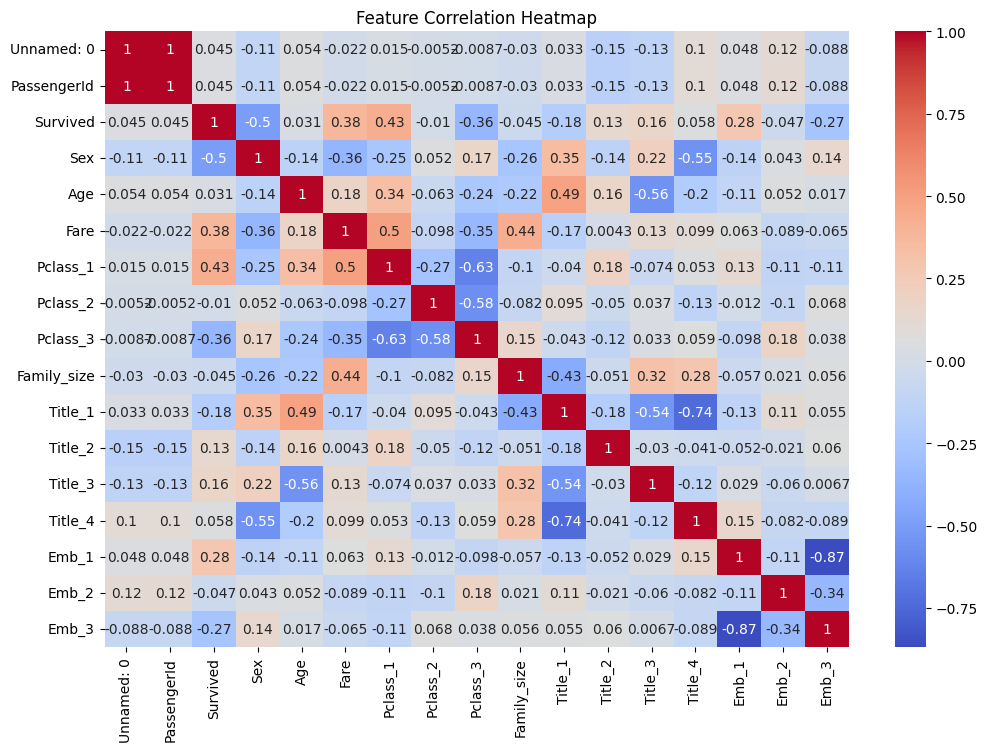

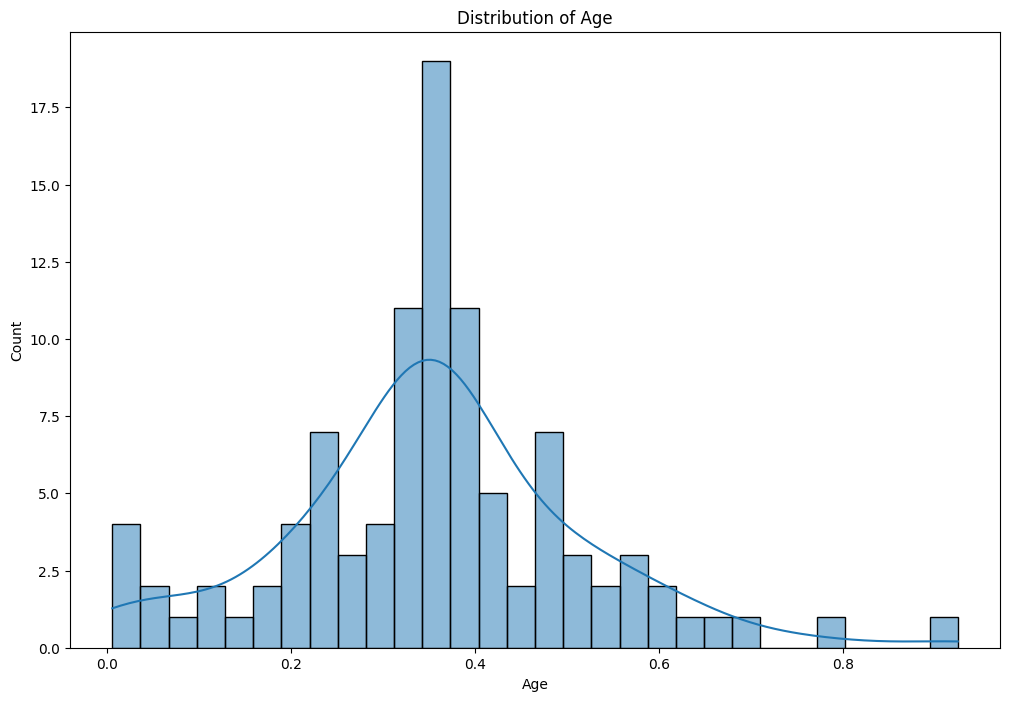

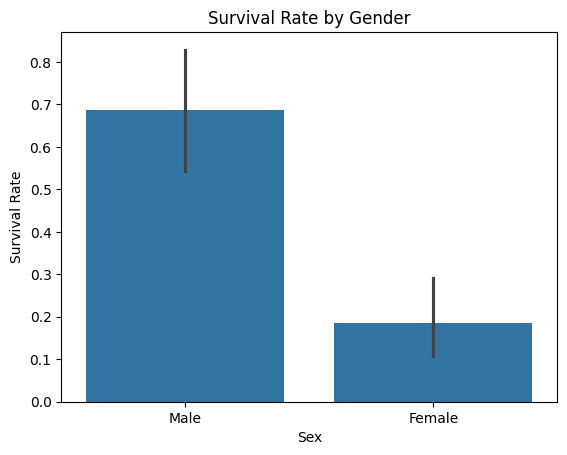

Error: 'Family_Size' column not found in the DataFrame.


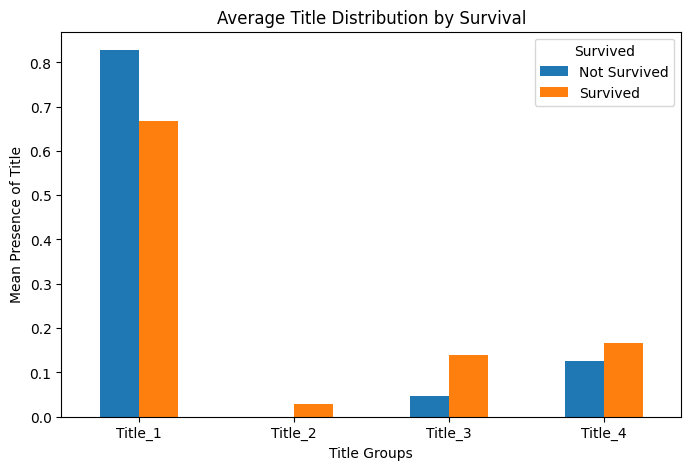

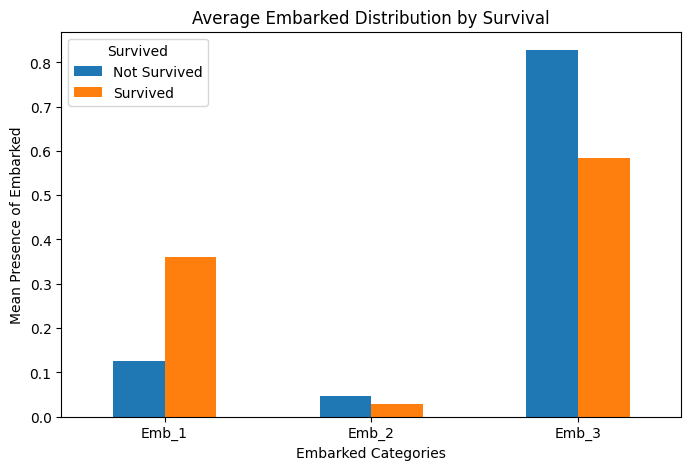

<ipython-input-13-059edfca0aa7>:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('test_data.csv')

print("Columns in the DataFrame:", df.columns)

print("Dataset Info:")
print(df.info())

print("\nSummary Satistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel("Survival Rate")
plt.xticks([0,1],['Male', 'Female'])
plt.show()

if 'Family_Size' in df.columns:
    sns.boxplot(x='Survived', y='Family_Size', data=df)
    plt.title("Family Size vs Survival")
    plt.show()
else:
    print("Error: 'Family_Size' column not found in the DataFrame.")

title_cols = ['Title_1', 'Title_2', 'Title_3', 'Title_4']
df_titles = df[title_cols+ ['Survived']]
df_titles = df_titles.groupby('Survived').mean().T

df_titles.plot(kind='bar', figsize=(8,5))
plt.title("Average Title Distribution by Survival")
plt.ylabel("Mean Presence of Title")
plt.xlabel("Title Groups")
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

emb_cols = ['Emb_1', 'Emb_2', 'Emb_3']
df_emb = df[emb_cols + ['Survived']]
df_emb = df_emb.groupby('Survived').mean().T

df_emb.plot(kind='bar', figsize=(8,5))
plt.title("Average Embarked Distribution by Survival")
plt.ylabel("Mean Presence of Embarked")
plt.xlabel("Embarked Categories")
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

df['Age'].fillna(df['Age'].median(), inplace=True)

if df['Sex'].dtype == 'object':
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df.dropna(inplace=True)